Given the dataset `{mcdonalds.csv}` which contains several surveys related to the customers of the famous fast-food McDonalds, a data analysis project is created to segment customers using the following techniques:

1. **PCA** (Principal Component Analysis).

2. **Clustering K-Means**

3. **Gerarchical (agglomerative)**

## Requirements

- [x] Apply a StandardScalar method to the data before processing.
- [x] Use the Elbow and Silhouette Score method, to choose the correct number of clusters.
- [x] Apply clustering on the projections on the two principal components. In the scatter plot displaying the clusters, also show the center of mass for each of the clusters.
- [x] Check for any correlations between customer segments, age, liking, and visit frequency.
- [x] The design should show histograms with the frequencies of selection on each feature.
- [x] In addition to the plot with the projection of the data into the two main components, show Scree Plot and Biplot.
- [x] In scale-type standardization each input variable is modified by subtracting the mean and dividing by the standard deviation to shift the distribution so that it has a mean of zero and a standard deviation of one.


# **Starting libraries and reading files**
Starting libraries and reading csv.

***Table of variables:***

| Variabile          | Tipo              | Descrizione                                                              |
| :----------------- | :---------------- | :----------------------------------------------------------------------- |
| `data`             | Pandas DataFrame  | Il DataFrame principale che contiene i dati importati dal file CSV.      |
| `file`             | Stringa           | Il nome del file CSV da cui vengono letti i dati ("mcdonalds.csv").       |
| `rows`             | Intero            | Il numero di righe da visualizzare nell'output iniziale (in questo caso, 15). |
| `tableau_colors`, `other_colors`, `all_colors`, `colors` | Liste di stringhe | Contengono i nomi dei colori utilizzati per la visualizzazione dei grafici. |


***The following blocks of code:***

1. Import the libraries needed for data analysis.
2. They open a CSV file (mcdonalds.csv) and display the data inside, printing part of the dataset.

1. ## *Importing libraries:*
    - `pandas` (pd): For reading, manipulating and analyzing data in table format.
    - `numpy` (np): For efficient numerical operations on multidimensional arrays.
    - `seaborn` (sns): For creating informative and attractive statistical graphs.
    - `matplotlib`: For creating custom graphs.
    - `sklearn`: For machine learning, including data preprocessing, dimensionality reduction (PCA) and clustering (K-means).
    - `scipy`: For hierarchical clustering.

In [1]:
import os
import pandas as pd   # to read, manipulate and analyze data
import numpy as np   # for numerical operations
import seaborn as sns   # for data visualization
import matplotlib.colors as mcolors # for color management
import matplotlib.pyplot as plt   # for data visualization
from sklearn.preprocessing import StandardScaler   # for preprocessing and normalization of data
from sklearn.decomposition import PCA   # for dimensionality reduction techniques such as Principal Component Analysis (PCA).
from sklearn.cluster import KMeans   # for the K-Means clustering algorithm.
from sklearn.metrics import silhouette_score   # for silhouette scoring calculation.
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram   # for hierarchical clustering and visualization of dendrograms
# for visualizing graphs within the notebook
os.environ["OMP_NUM_THREADS"] = '6'

2. ## *Display settings:*
    - `%matplotlib inline`: Configures the Jupyter notebook to display graphs within the notebook itself.
    - `plt.style.use('ggplot')`: Sets the graph display style similar to that of ggplot2 (a popular visualization package in R).
    - Defines lists of colors (`tableau_colors`, `other_colors`, `all_colors`) that will be used for graphs.
    - **Reading Data:**
        - `file = "mcdonalds.csv"`: Assigns the name of the CSV file to the `file` variable.
        - Try reading data from the CSV file into a Pandas DataFrame (`data`).
        - If the file cannot be read, an error message is printed.
    - **Initial Display:**
        - Prints information about the number of rows displayed and the size of the DataFrame (`data.shape`).
        - `data.head(11)`: Displays the first 11 rows of the DataFrame to give an initial idea of the data.

In [2]:
%matplotlib inline
plt.style.use('ggplot')   # set the display style of the graphs
tableau_colors = list(mcolors.TABLEAU_COLORS.keys())
other_colors = list(mcolors.XKCD_COLORS.keys())
all_colors = tableau_colors + other_colors
colors = all_colors[:14]
file = r"C:\Users\Alessandro\Documents\Programmazione\Python\Jupyter Notebook\McDonald's Data Science Project\mcdonalds.csv"   # file name to read
try:
    data = pd.read_csv(file)   # DataFrame Pandas object containing the data
except:
    print("Dataset could not be loaded. Is the dataset missing?")   # generic exception in the event that the file is not manipulatable

rows = 15   # number of rows to display
print("Displaying the first", rows-1, "rows of", file, "of dimension:", data.shape, "\n" )   # print a presentation string

data.head(11)

Displaying the first 14 rows of C:\Users\Alessandro\Documents\Programmazione\Python\Jupyter Notebook\McDonald's Data Science Project\mcdonalds.csv of dimension: (1453, 15) 



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


## **Recovery of essential information on datasets and components**

***Table of Variables:***

In these specific code blocks, no new variables are created.

***The following code blocks:***

1. They display relevant information about the DataFrame to assess data quality.
2. They search for any missing data.

1. ## *DataFrame information summary*
    - `data.info()` provides a summary of the DataFrame `data`:
        - Number of rows and columns in the DataFrame.
        - Types of data in each column (e.g., integers, floats, strings, etc.).
        - Amount of memory used by the DataFrame.
        - The number of non-zero values in each column.

In [3]:
data.info()   # prints a summary of the information contained in the dataframe (number of rows, columns, data type, memory used)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


> The dataframe has size 15x1453, 15 columns (features) of dtype object, one numeric ('Age': numpy.int64).

2. ## *Find missing values*
    - `data.isna().sum()` prints the number of missing values for each column in the dataframe:
        - `data.isna()` creates a Boolean dataframe where `True` indicates a missing value (NaN) and `False` indicates a non-missing value.
        - `.sum()` calculates the sum of the `True` values in each column, essentially providing the count of missing values per column.

In [4]:
print("Missing values:", "\n", data.isna().sum())   # creates a boolean DataFrame where `True` indicates a missing value (NaN) and `False` indicates a non-missing value.

Missing values: 
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


> The dataframe has no missing values! There is no need for a data cleaning step and you can go directly to the exploration step.

**Pre-discretization data exploration and visualization**.
Allows you to familiarize yourself with the variables in the dataset, their distributions, and the relationships between them.

***Table of Variables***

| Variable | Type | Description |
|----------------|---------------|----------------------------------------------------------------------------------------|
| `columns` | List | Contains the names of the columns of interest in the dataset.                                |
| `like_order` | List | Contains the display order of all components of the feature 'Like' |

***The following blocks of code:***

1. Define and display the distribution of the first 11 features.
2. They display the distribution of 'Gender'.
3. They visualize the distribution of 'Like', correlation with 'Age'.
4. They display the distribution of 'Age'.
5. They display the distrubution of 'VisitFrequency'.

1. ## *Counting unique values for each feature*.
   - `columns`: a list containing the names of the columns you want to analyze.
   - For each column (`col`):
      - `data[col].value_counts()`: calculates and prints the count of how many times each unique value appears in that column.

In [5]:
columns = ['yummy', 'convenient','spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']   # A list containing the names of the columns you want to analyze.

for col in columns:
    print(data[col].value_counts(), '\n')   # counts unique values by column

yummy
Yes    803
No     650
Name: count, dtype: int64 

convenient
Yes    1319
No      134
Name: count, dtype: int64 

spicy
No     1317
Yes     136
Name: count, dtype: int64 

fattening
Yes    1260
No      193
Name: count, dtype: int64 

greasy
Yes    765
No     688
Name: count, dtype: int64 

fast
Yes    1308
No      145
Name: count, dtype: int64 

cheap
Yes    870
No     583
Name: count, dtype: int64 

tasty
Yes    936
No     517
Name: count, dtype: int64 

expensive
No     933
Yes    520
Name: count, dtype: int64 

healthy
No     1164
Yes     289
Name: count, dtype: int64 

disgusting
No     1100
Yes     353
Name: count, dtype: int64 



2. ## *Displaying the gender distribution*.
   - `print(data['Gender'].value_counts())`: counts the values in the 'Gender' column.
   - A pie chart (`plt.pie`) is created to display the proportion of each gender.

Gender
Female    788
Male      665
Name: count, dtype: int64


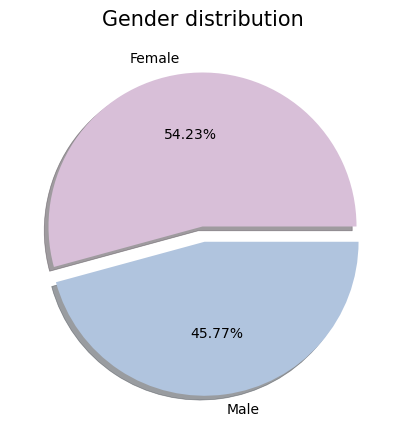

In [6]:
print(data['Gender'].value_counts())   # prints the count of unique values for each column
plt.figure(figsize=(5, 5))   # set the size of the figure
plt.pie(data['Gender'].value_counts(),   # creates a pie chart that counts the number of male and female customers.
        colors=['thistle', 'lightsteelblue'],   # Custom colors for the pie chart
        explode=[0, 0.1],   # separates the slices
        labels=['Female', 'Male'],   #labels with names
        shadow=True,   # shadow effect
        autopct='%.2f%%')   #format percentages
plt.title('Gender distribution', fontsize=15)   # chart title
plt.axis('off')   # hides the axes of the graph

plt.show()

3. ## *Displaying the distribution of the liking index*.
   - `like_order`: defines the specific order in which the feature components will be displayed.
   - `data['Like'].value_counts()`: calculates and prints the count of how many customers answered "Yes" or "No".
   - `sns.catplot`: Creates a scatter plot (`swarm`) to display the correlation between the `Like` column and the `Age` column.

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64 



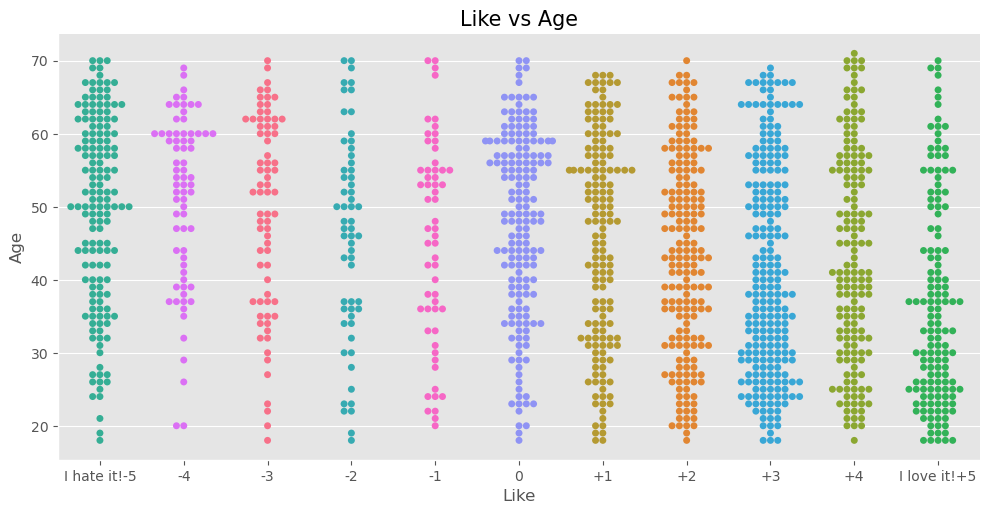

In [7]:
like_order = ['I hate it!-5', -4, -3, -2, -1, 0, '+1', '+2', '+3', '+4', 'I love it!+5']   # order of 'Like' responses
print(data['Like'].value_counts(), '\n')   # count of 'yes' or 'no' answers.
sns.catplot(x="Like",   # creates the scatter plot
            y="Age",   # I select the names of the axes
            data=data,   # data frame
            orient="v",   # orientation of the graph
            height=5,   # height of the graph
            aspect=2,   # ratio of width to height
            hue='Like',   # Color the dots according to the 'Like' column.
            kind="swarm",   # chart type
            order=like_order)   # order of 'Like' responses
plt.title('Like vs Age', fontsize=15)   # chart title
plt.show()

> The resulting graph allowed us to visually observe whether there are any trends or relationships between the age of respondents and their level of liking.

4. ## *Display of age distribution*.
   - `print(data.describe())`: prints descriptive statistics of all **numeric** columns in the DataFrame ('Age').
   - A bar graph (`sns.countplot`) is created to show how many customers there are for each detected age.

               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000 



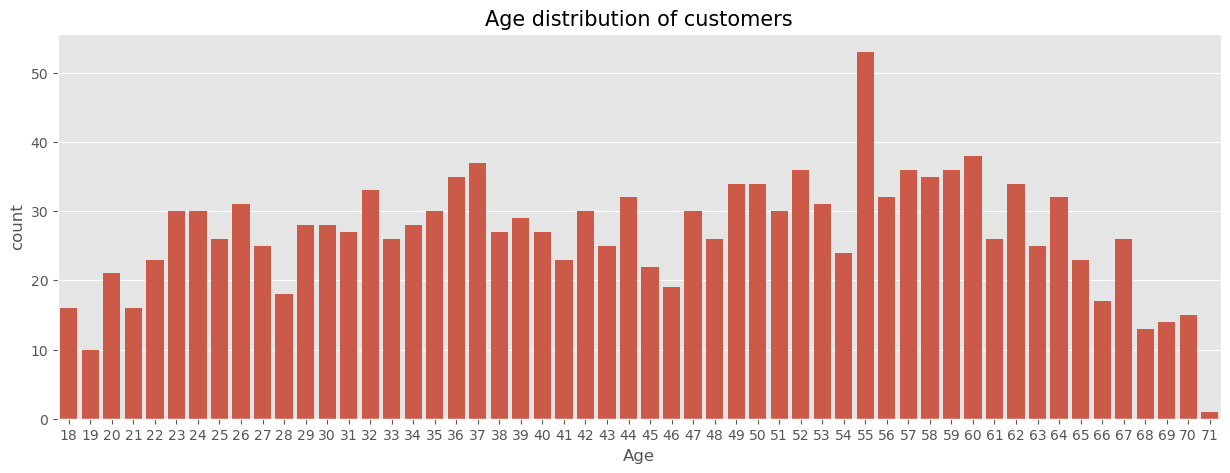

In [8]:
print(data.describe(), "\n")   # Print descriptive statistics on age

plt.figure(figsize=(15, 5))
sns.countplot(x=data['Age'])
plt.title('Age distribution of customers', fontsize=15)
plt.show()

> *Values such as percentiles have been useful for better segmentation of age groups.*

5. ## *Visualization of visit frequency distribution*.
   - `print(data['VisitFrequency'].value_counts())`: calculates and prints the visit frequency count.
   - `sns.countplot()` counts the number of customers by visit frequency.

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64 



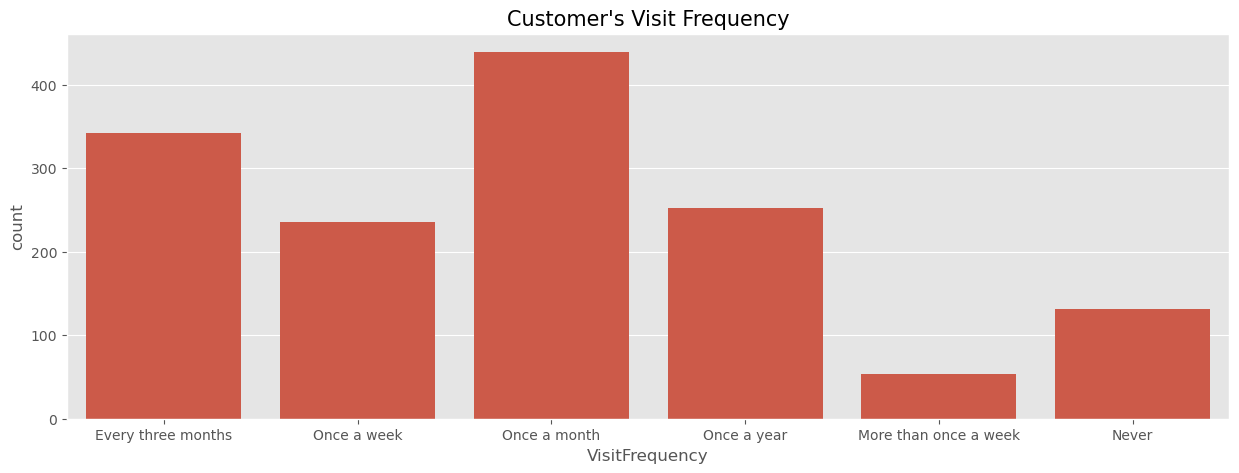

In [9]:
print(data['VisitFrequency'].value_counts(), '\n')   # unique component count for 'VisitFrequency' column.

plt.figure(figsize=(15, 5))
sns.countplot(x=data['VisitFrequency'])   # creates a bar graph that counts the number of customers by frequency of visitation
plt.title("Customer's Visit Frequency", fontsize=15)
plt.show()

**Discretization of data**
Facilitate in the next stage the identification of relationships between variables for building predictive models.

***Table of variables:***

|Variable|Type|Description|.
|---|---|---|
|`columns_to_replace`|List|A list of column names in the DataFrame `data` that will be modified.|
|`replacement_dict`|Dictionary|A dictionary that maps the original values in the selected columns to the new numeric values.|
|`VisitSostitution`||Dictionary|A dictionary that maps the original values in the `VisitFrequency` column to the new numeric values.|
|`age_bins`|List|A list that defines the boundaries of the age ranges.|
|`age_labels`|List|A list of numerical labels corresponding to age intervals.|

***Code description:***

The following code block reduces the data dimensionality and displays whether the operation was successful, steps are listed:

- **Replacement of Categorical Values:**
    - Iterates through the columns listed in `columns_to_replace`.
    - For each column, it maps the original values (such as 'Yes', 'No', 'Male', 'Female', etc.) to the corresponding numeric values in the `replacement_dict` dictionary.
    - This converts categorical variables to numerical variables, which is often necessary for some types of statistical analysis and machine learning.

- **Replacement of Values in the `VisitFrequency' Column:**
    - Uses the `VisitSostitution` dictionary to map the original values in the `VisitFrequency` column (such as `More than once a week`, `Once a week`, etc.) to numeric values from 5 to 0, representing the frequency of visits.

- **Discretization of the `Age` Variable:**
    - Divides the continuous variable `Age` into intervals (bins) using the bounds specified in `age_bins`.
    - Assigns a numeric label (`age_labels`) to each age interval.
    - Converts the `Age` column to an integer data type (`int64`).
    
- **Visualization:**
    - `data.head(11)`: Displays the first 11 rows of the modified DataFrame to verify the transformations performed.

In [10]:
columns_to_replace = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender', 'Like']   # columns to be replaced

replacement_dict = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'I hate it!-5': -5, 'I love it!+5': 5, '+1':1, '+2':2, '+3':3, '+4':4, '-1':-1, '-2':-2, '-3':-3, '-4': -4, '0':0}   # substitution dictionary

for col in columns_to_replace:
    data[col] = data[col].map(pd.Series(replacement_dict))   # replaces column values with values from the substitution dictionary

VisitSostitution = {'More than once a week': 5, 'Once a week': 4, 'Once a month' : 3, 'Every three months': 2, 'Once a year' : 1, 'Never': 0 }   # replacement dictionary for 'VisitFrequency' column
data['VisitFrequency'] = data['VisitFrequency'].map(VisitSostitution)   # replaces values in the 'VisitFrequency' column with values from the replacement dictionary

age_bins = [18, 33, 45, 57, 71]   # defines the age ranges
age_labels = [1, 2, 3, 4]   

data['Age'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)   # creates age ranges and assigns a label to each range
data['Age'] = data['Age'].astype('int64')   # converts the 'Age' column to an integer data type

data.head(11)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,4,2,0
1,1,1,0,1,1,1,1,1,1,0,0,2,3,2,0
2,0,1,1,1,1,1,0,1,1,1,0,1,4,2,0
3,1,1,0,1,1,1,1,1,0,0,1,4,4,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,3,3,1
5,1,1,0,1,0,1,1,1,0,0,0,2,3,2,1
6,1,1,1,1,0,1,0,1,1,1,0,2,3,2,0
7,1,1,0,1,1,1,1,1,0,0,0,5,1,4,0
8,0,0,0,1,1,0,0,0,1,0,1,-5,4,1,1
9,1,1,0,1,1,1,0,1,1,0,0,1,1,2,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int64
dtypes: int64(15)
memory usage: 170.4 KB


> Note how successful the data dimensionality reduction was: all features have integer values on which it is now possible to operate!

**Post-discretization data exploration and visualization**.
This type of exploratory data analysis is useful for understanding the nature of the data, identifying any outliers or interesting patterns, and making informed decisions about the next steps in the analysis.

***Table of variables:***

|Variable|Type|Description|.
|---|---|---|
|`focused_data`|Pandas DataFrame|A subset of the original DataFrame (`data`) containing only the first 11 columns.|
|`numeric_columns`|Pandas DataFrame|A subset of `focused_data` containing only the columns with numeric data.|
|`column_means`|Pandas Series|A Series containing the average of each numeric column in `focused_data`, rounded to 2 decimal places.|
|`corr`|Pandas DataFrame|A DataFrame containing the correlation matrix between the numeric columns in `focused_data`.|

***The following code blocks:***

1. Display preferred features by feature.
    - It averages each numeric column and displays the distribution of values through histograms
2. They visualize the correlation between the preferred features.
    - The correlation matrix (heatmap type) shows how the variables are related to each other, helping to identify positive, negative or null relationships.
3. Display correlations between 'Age' and preferred features.
    - It allows us to compare how different age groups perceive fast food attributes.
4. Display correlations between 'Likes' and preferred features.
    - Allows us to compare average ratings of McDonald's features for different levels of liking, using a clustered bar graph.
5. VIsualize correlations between 'VisitFrequency' and preferred features.
    - It allows us to compareaverage ratings of fast food features for different visit frequency groups, using a clustered bar graph.

1. ## *Preferred single feature display*
    - `focused_data` isolates the first 11 columns in a new DataFrame
    - `numeric_columns` keeps only columns with numeric data in
    - `column_means` calculates and prints the average of each numeric column.
    - `focused_data.hist()` creates and displays a histogram for each numeric column, illustrating the distribution of values and helping to identify any anomalies or interesting patterns.

Mean for each column: 
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


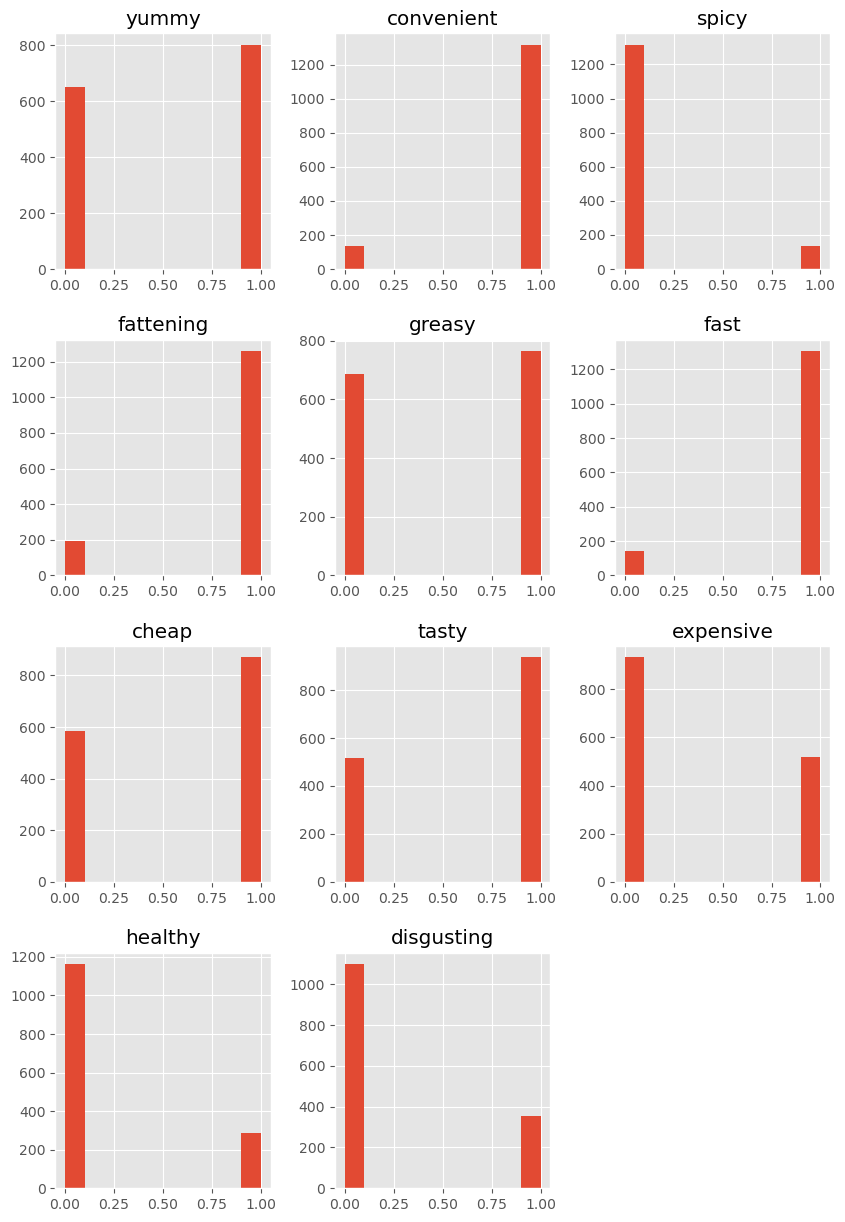

In [12]:
focused_data = data.iloc[:,0:11]   # select the first 11 features

numeric_columns = focused_data.select_dtypes(include=np.number)   # select numeric columns
column_means = np.round(np.mean(numeric_columns, axis=0), 2)   # calculates the average of the columns
print("Mean for each column:", "\n", column_means)   # print the average of all columns

plt.rcParams['figure.figsize'] = (10,15)   # set the size of the figure
focused_data.hist()   # creates a histogram for each column
plt.title('Features values distribution', fontsize=15)   
plt.show()

> Histograms can provide useful information on the shape of the data distribution (symmetrical, asymmetrical, etc.), the presence of outliers, and the concentration of values in certain intervals.

2. ## *Viewing correlation between features with heatmap*.
    - `corr = focused_data.corr()` calculates the correlation matrix between all pairs of numeric columns in `focused_data`.
    - `sns.heatmap(corr, ...)` creates a heatmap (heat map) to display the correlation matrix:

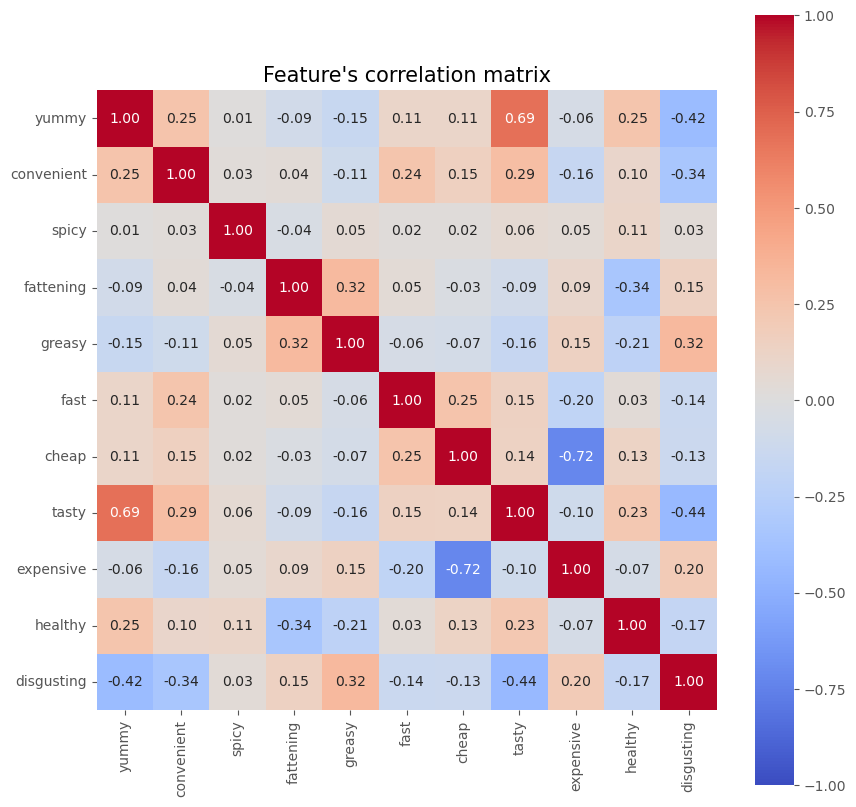

In [13]:
corr = focused_data.corr() # Calculate the correlation matrix
plt.subplots(figsize=(10, 10))

sns.heatmap(corr,   # load the correlation matrix
            annot=True,   # notes the values on the heat map
            square=True,   # makes the map square
            fmt=".2f",   # format the values
            vmin = -1,   # minimum value
            vmax = 1,   # maximum value
            center = 0,   # center
            cmap = 'coolwarm')   # color map
plt.title("Feature's correlation matrix", fontsize=15)
plt.show()

> Correlation matrix analysis can help discover which variables are most strongly correlated with each other and thus potentially most relevant for further analysis or for building predictive models.
> - Positive correlations: values close to 1 indicate a strong positive relationship (when one variable increases, the other tends to increase as well).
> - Negative correlations: values close to -1 indicate a strong negative relationship (when one variable increases, the other tends to decrease).
> - Null correlations: values close to 0 indicate a weak or absent linear relationship.

3. ## *Displaying correlation between 'Age' and preferred features*.

- `age_group_means` calculates the average of all numeric columns in the `data` DataFrame for each age group defined in the `Age` column. The result is a new DataFrame `age_group_means` in which the index represents the age groups and the columns represent the features, with the values corresponding to the averages for each group.

- `features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','Like','VisitFrequency','Gender']` a list containing the names of the features that are displayed in the graph.

- `age_group_means = age_group_means[features]` selects only the columns (features) specified in the `features` list from the `age_group_means` DataFrame.
    - In this way, the resulting DataFrame will contain only the averages of the features of interest for each age group.

- `for age_group in age_group_means.index` starts a loop that iterates over each age group in the index of the DataFrame `age_group_means`.
    - `plt.plot(...)`creates a line graph for each age group:
        - `age_group_means.columns` represents the values on the x-axis, which are the feature names.
        - `age_group_means.loc[age_group]` represents the values on the y-axis, which are the averages of the features for the current age group.
        - `marker='o'` specifies that the data points are to be represented by circles.
        - `label=age_group` assigns a label to the line, which corresponds to the age group.

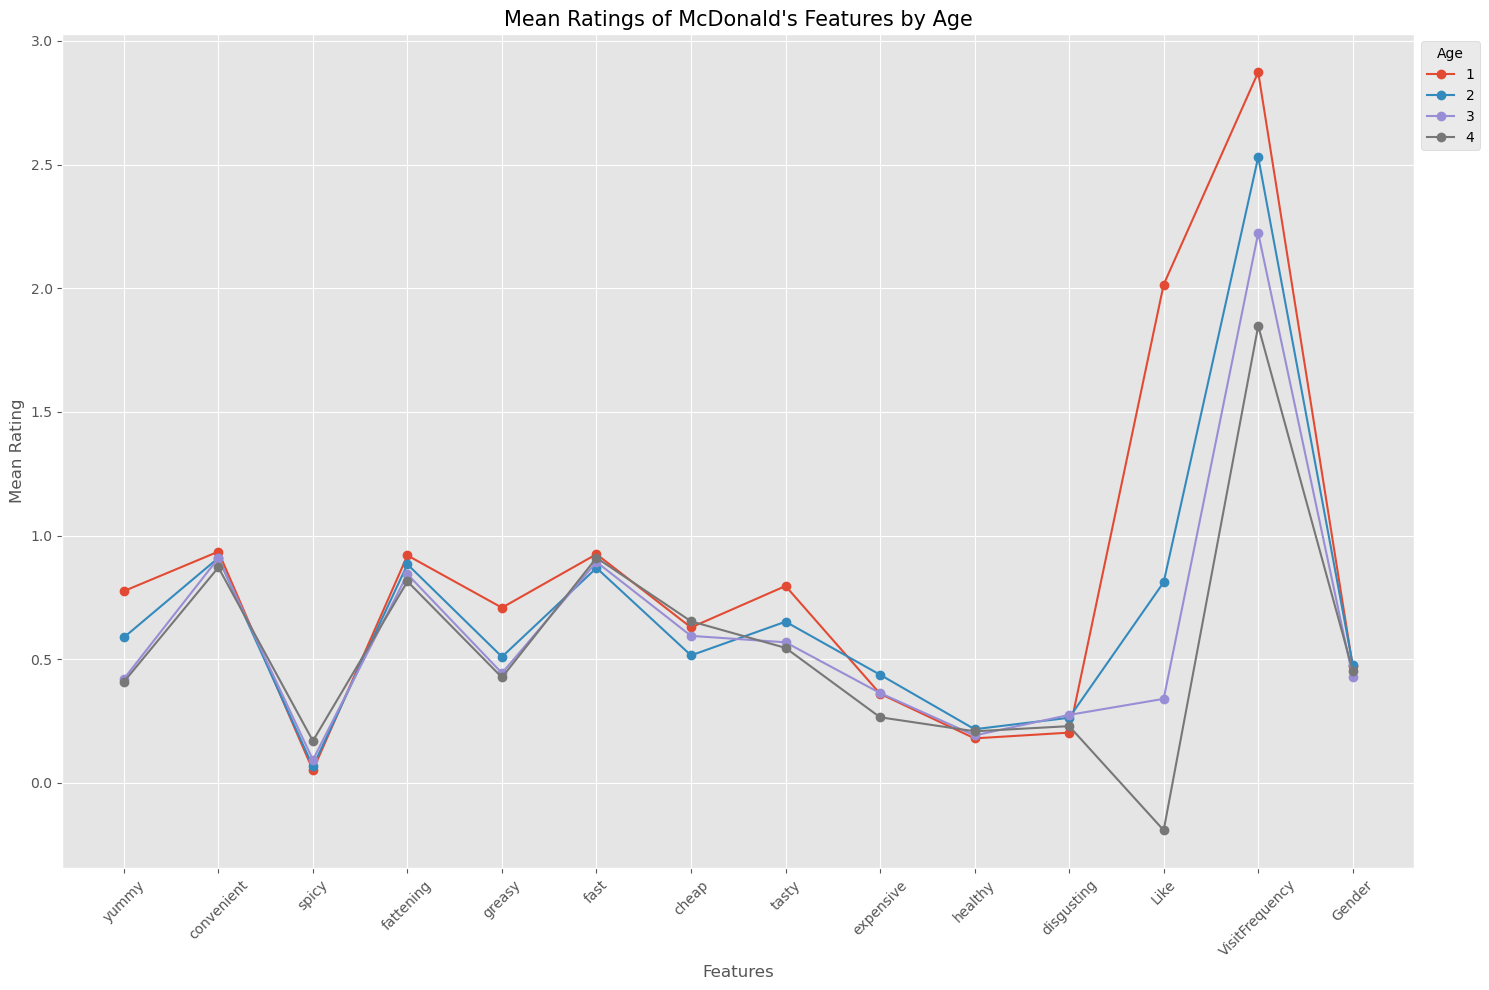

In [14]:
age_group_means = data.groupby('Age').mean()   # calculates the average of the characteristics for each age group.

features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','Like','VisitFrequency','Gender']   # select features to display
age_group_means = age_group_means[features]   # select characteristics for each age group

plt.figure(figsize=(15, 10))
for age_group in age_group_means.index:
    plt.plot(age_group_means.columns, age_group_means.loc[age_group], marker='o', label=age_group)   # Create a line graph for each age group.

plt.title('Mean Ratings of McDonald\'s Features by Age', fontsize=15)
plt.xlabel('Features')
plt.ylabel('Mean Rating')
plt.legend(title='Age', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. ## *Displaying correlation between 'Like' and preferred features*.

    - `features` defines a list containing the names of features (e.g., "yummy," "convenient," "spicy," etc.) that will be analyzed.

    - `like_group_means = data.groupby('Like').mean()` calculates the average of all numeric columns in the `data` DataFrame for each group defined by the like levels in the `Like` column.
        - The result is a new DataFrame `like_group_means` in which the index represents the liking levels (e.g., `5`, `4`, ..., `5`) and the columns represent the features, with the values corresponding to the averages for each group.

    - `like_group_means = like_group_means[features]` selects only the columns (features) specified in the `features` list from the DataFrame `like_group_means`.
        - In this way, the resulting DataFrame will contain only the averages of the features of interest for each like group.

    - `age_groups = like_group_means.index` extracts the indices (the liking levels) from the `like_group_means` DataFrame and assigns them to the `age_groups` variable.

    - `x = np.arange(len(features))` creates a NumPy `x` array containing integers from 0 to the length of the `features` list minus 1. These numbers will be used to place the bars on the x-axis of the graph.

    - `for i, age_group in enumerate(age_groups)` starts a loop that iterates over each level of liking in `age_groups`
        - `ax.bar(...)` creates a set of bars for each age_group:
            - `x + i*width`: Calculates the position of each bar on the x-axis, moving the bars in each successive group by an amount equal to `width`.
            - `like_group_means.loc[age_group]`: Gets the feature averages for the current like group.
            - `label=str(age_group)`: Assigns a label to the bars of the current group (e.g., "-5", "-4", etc.).
            - `color=colors[i]`: Assigns a different color to the bars of each liking group.

    - `age_groups = like_group_means.index.astype(str)`:
        - Converts index values (the liking levels) to strings to avoid display problems in the legend.

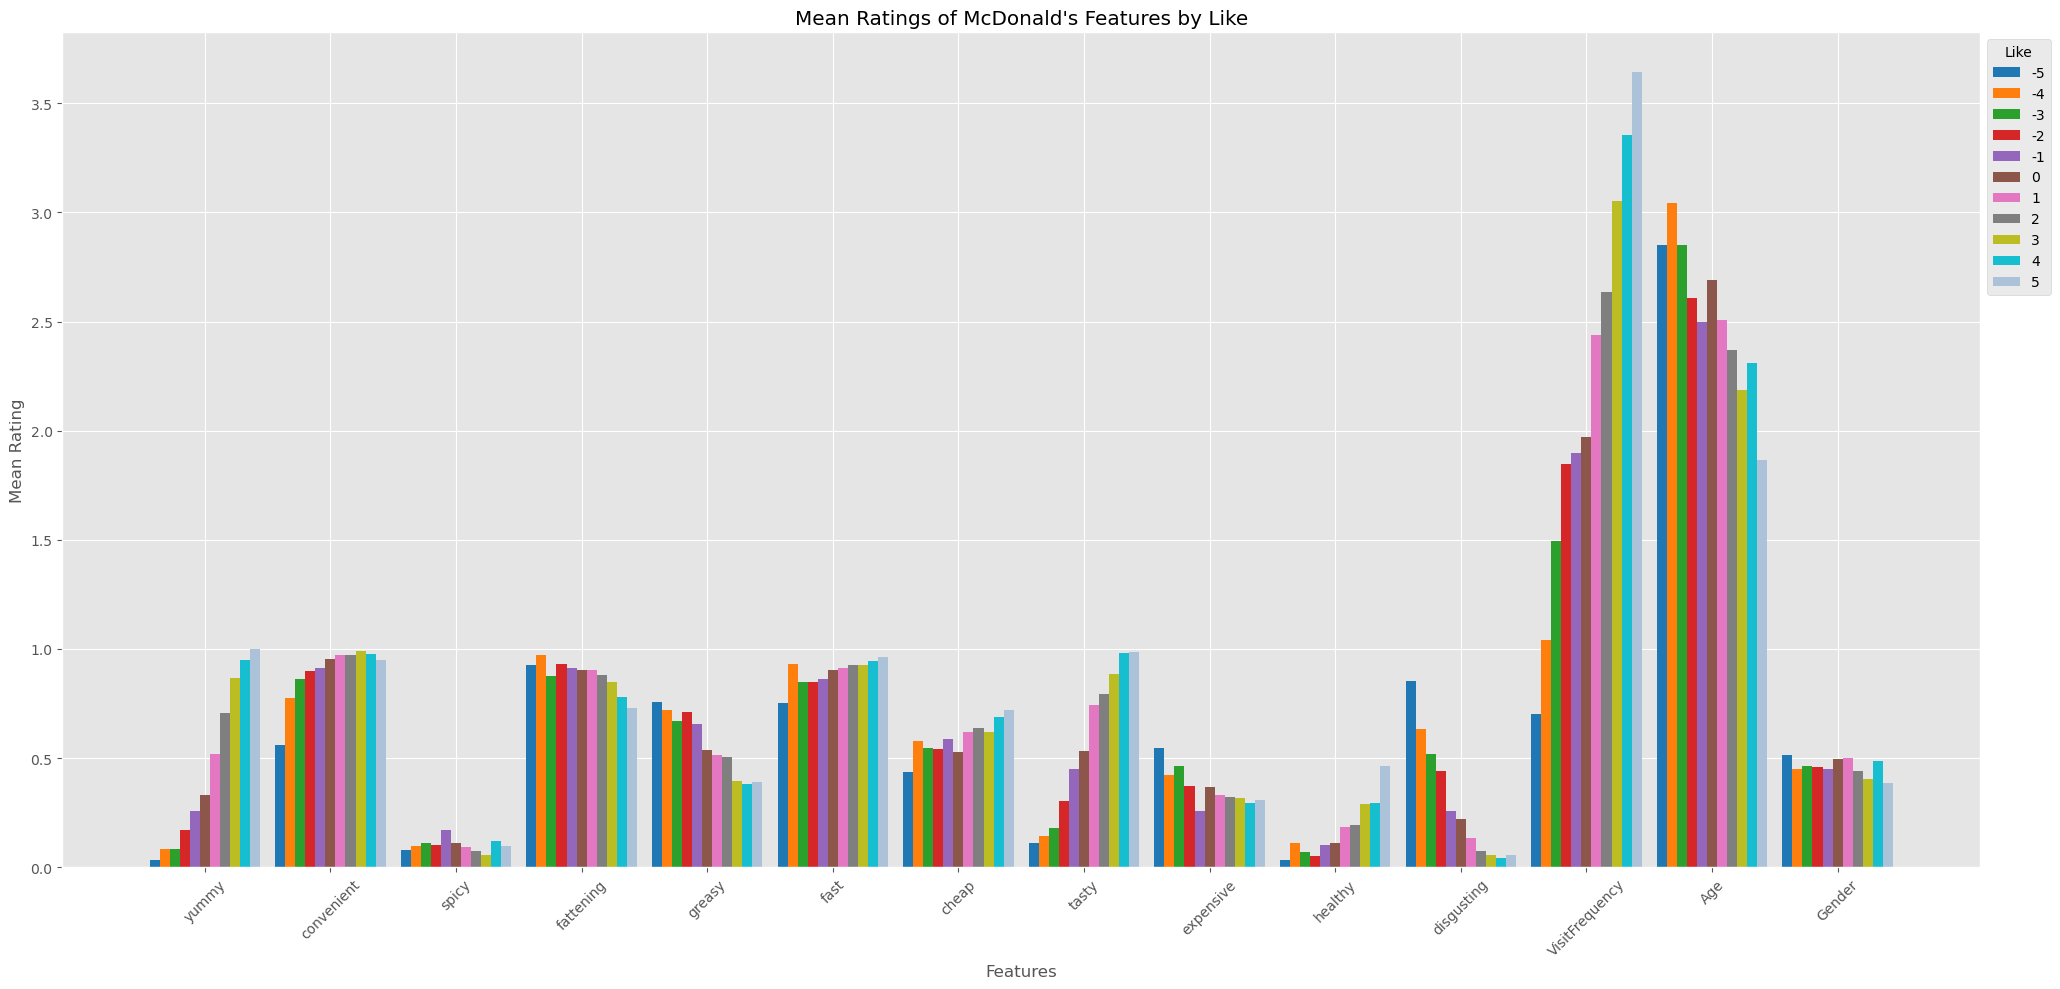

In [15]:
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','VisitFrequency','Age','Gender']   # select features to display
like_group_means = data.groupby('Like').mean()   # calculates the average of the characteristics for each age group.

like_group_means = like_group_means[features]   # select characteristics for each age group

age_groups = like_group_means.index   # age group label
x = np.arange(len(features))  # The features label
width = 0.08  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
for i, age_group in enumerate(age_groups):
    ax.bar(x + i*width, like_group_means.loc[age_group], width, label=str(age_group), color=colors[i])   # Create a bar graph for each age group.

# Add some labels
ax.set_xlabel('Features')
ax.set_ylabel('Mean Rating')
ax.set_title('Mean Ratings of McDonald\'s Features by Like')
ax.set_xticks(x + width / 2 * (len(age_groups) - 1))
ax.set_xticklabels(features, rotation=45)

age_groups = like_group_means.index.astype(str)   
ax.legend()
ax.grid(True)

fig.tight_layout()
plt.legend(title='Like', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

5. ## *Displaying correlation between 'VisitFrequency' and preferred features*.

    - `features` defines a called list containing the names of the features that will be analyzed.
    - `frequency_group_means = data.groupby('VisitFrequency').mean()` calculates the average of all numeric columns in the `data` DataFrame for each group defined by the visit frequency levels present in the `VisitFrequency` column.
        - The result is a new DataFrame `frequency_group_means` in which the index represents the visit frequency levels (e.g., `Never`, `Once a year`, etc.) and the columns represent the features, with the values corresponding to the averages for each group.
    - `frequency_group_means = frequency_group_means[features]` selects only the columns (features) specified in the `features` list from the `frequency_group_means` DataFrame. In this way, the resulting DataFrame will contain only the averages of the features of interest for each visit frequency group.
    - `age_groups = frequency_group_means.index` extracts the indices (the visit frequency levels) from the `frequency_group_means` DataFrame and assigns them to the `age_groups` variable. This variable will later be used to label the bars in the graph.
    - `x = np.arange(len(features))` creates a NumPy `x` array containing integers from 0 to the length of the `features` list minus 1.
        - These numbers will be used to place the bars on the x-axis of the graph.
    - `for i, age_group in enumerate(age_groups)` a loop that iterates over each level of visit frequency (`age_group`) in `age_groups`. The index `i` is used to calculate the position of the bars on the x-axis and to select the appropriate color from the `colors` list.
    - `ax.bar(x + i*width, frequency_group_means.loc[age_group], width, label=str(age_group))` creates a set of bars for each visiting frequency group:
            - `x + i*width`: Calculates the position of each bar on the x-axis, moving the bars in each successive group by an amount equal to `width`.
            - `frequency_group_means.loc[age_group]`: Gets the feature averages for the current visit frequency group.
            - `label=str(age_group)`: Assigns a label to the bars in the current group (e.g., "Never", "Once a year", etc.).

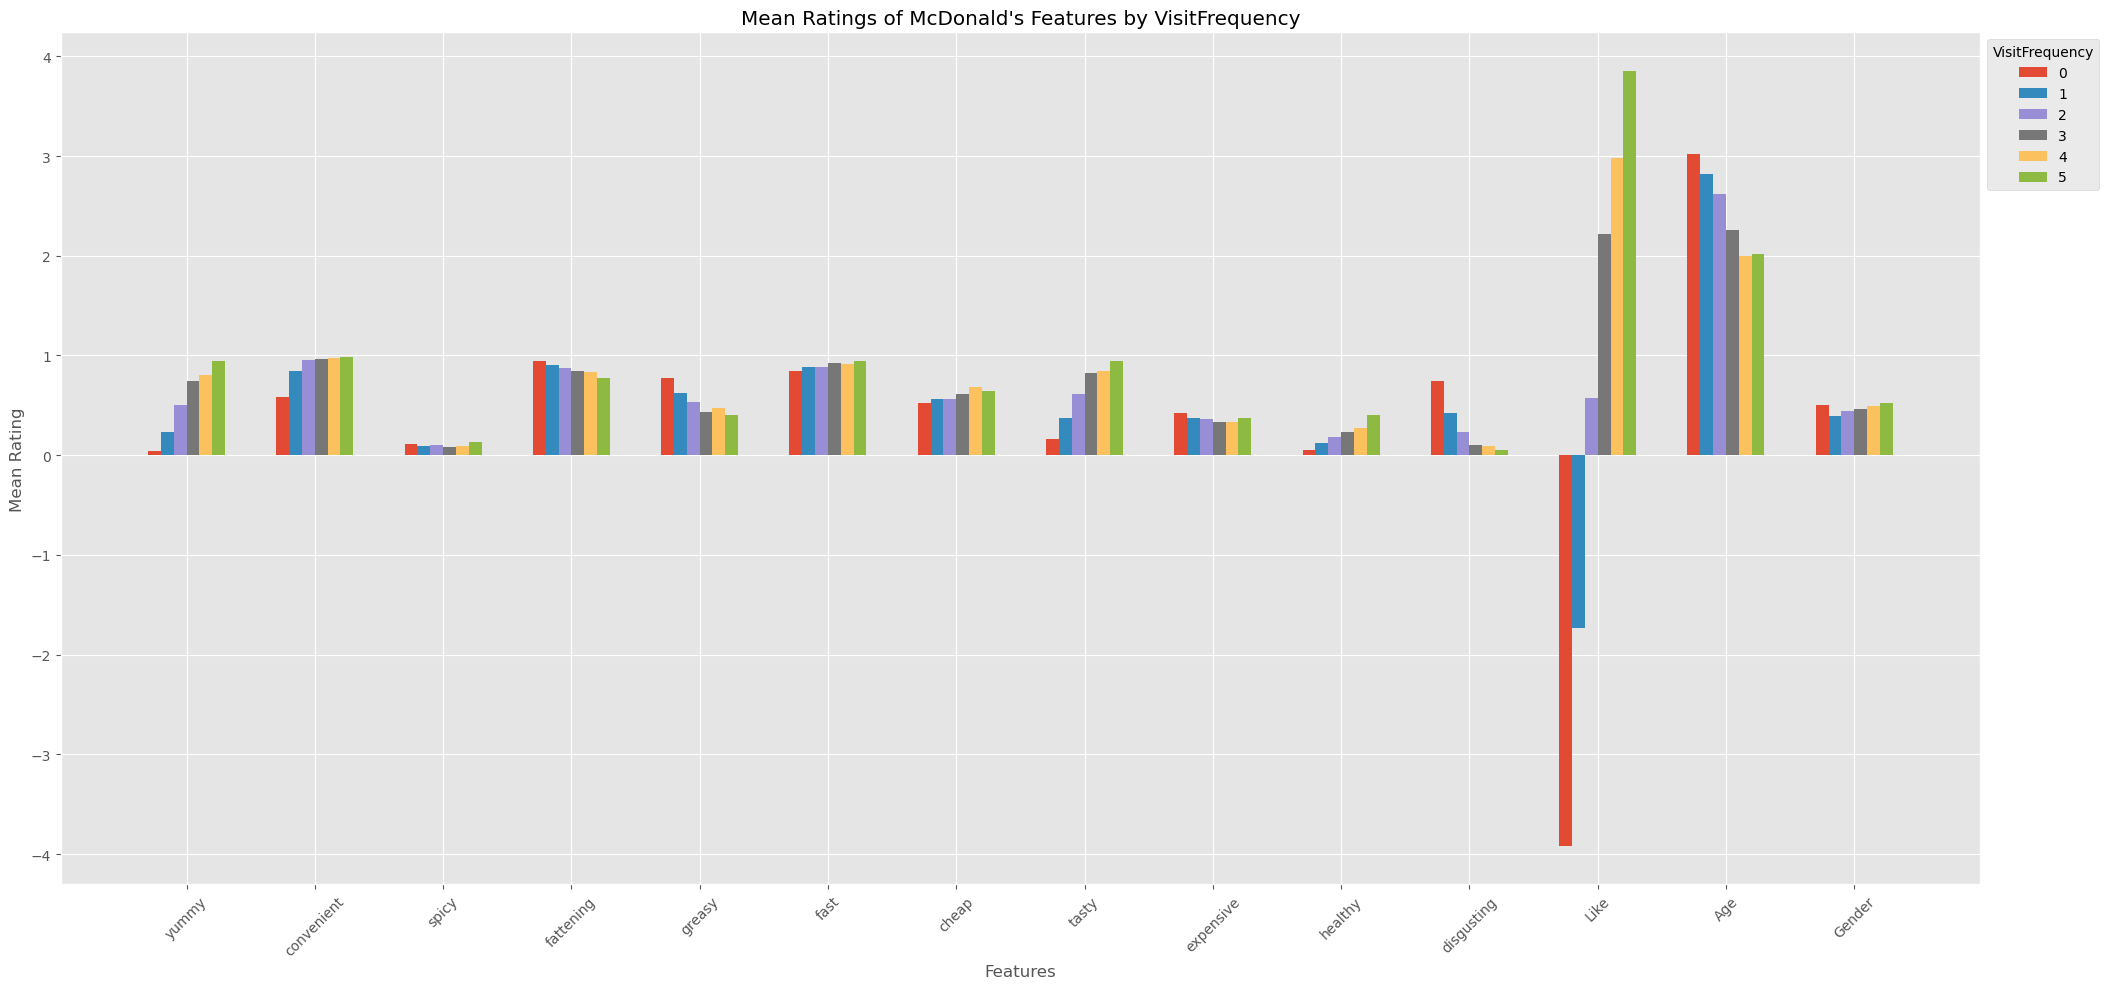

In [16]:
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','Like','Age','Gender']   # select features to display
frequency_group_means = data.groupby('VisitFrequency').mean()   # calculates the average of the characteristics for each age group.

frequency_group_means = frequency_group_means[features]   # select characteristics for each age group

age_groups = frequency_group_means.index   # age group label
x = np.arange(len(features))  # The features label
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
for i, age_group in enumerate(age_groups):
    ax.bar(x + i*width, frequency_group_means.loc[age_group], width, label=str(age_group))   # Create a bar graph for each age group.

# Add some labels
ax.set_xlabel('Features')
ax.set_ylabel('Mean Rating')
ax.set_title('Mean Ratings of McDonald\'s Features by VisitFrequency')
ax.set_xticks(x + width / 2 * (len(age_groups) - 1))
ax.set_xticklabels(features, rotation=45)

age_groups = frequency_group_means.index.astype(str)
ax.legend()
ax.grid(True)

fig.tight_layout()
plt.legend(title='VisitFrequency', bbox_to_anchor=(1, 1), loc='upper left', )
plt.show()

# **PCA**

PCA reduces data complexity by combining the original variables into a smaller number of principal components that capture most of the variance.

***Table of variables:***

| Variable | Type | Description |
| ----------------- | -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `sc` | StandardScaler object | A StandardScaler object used to standardize data.                                                                                                      |
| `scaled_df` | NumPy array | A NumPy array containing the data standardized after applying StandardScaler.                                                                                  |
| `pca` | PCA object | A PCA (Principal Component Analysis) object used to reduce the dimensionality of the data.                                                                      |
| `pc` | NumPy array | A NumPy array containing principal components extracted from the standardized data.                                                                                     |
| `pca_df` | Pandas DataFrame | A Pandas DataFrame containing the principal components, with column names from 'PC1' to 'PC11'. |
| `component_numbers` | Range object | A sequence of numbers from 1 to the total number of principal components. Used as labels on the x-axis of the explained variance bar graph.             |
| `PC_values` | NumPy array | A NumPy array containing numbers from 1 to the number of principal components. Used as x-coordinates in the scree plot.                                                |
| `sd` | Pandas Series | A Series containing the standard deviation of each principal component in the `pca_df` DataFrame.                                                                 |

***The following blocks of code:***
1. Standardize the data, compute a PCA, and create a dataframe with PCs.
    - *Objective*: reduce the dimensionality of the original data using PCA.
2. They visualize the dispersion of the PCs.
3. They visualize the variance ratio among the PCs.
    - They display the variance explained by each principal component in two ways: via a bar graph and a scree plot.
4. Visualize of the variance of characteristics among PCs.

1. ## *Data standardization and PCA*
    - **Data standardization:**
        - `sc = StandardScaler()` initializes a `StandardScaler` object. This object is used to standardize the data, that is, transform features so that they have zero mean and unit standard deviation.
        - `scaled_df = sc.fit_transform(focused_data)` applies the standardization to the data in the `focused_data` DataFrame.
            - The `fit_transform` method calculates the mean and standard deviation of each column and then scales the data accordingly. The result is a NumPy `scaled_df` array containing the standardized data.

    - **Principal Component Analysis (PCA):**
        - `pca = PCA(n_components=11)`: Initializes a `PCA` object specifying that 11 principal components are to be extracted. PCA is a dimensionality reduction technique that finds new features (principal components) that capture most of the variance in the original data.
        - `pc = pca.fit_transform(scaled_df)`: Applies PCA to the standardized `scaled_df` data.
            - The `fit_transform` method calculates the principal components and transforms the original data into the principal component space. The result is a NumPy `pc` array containing the principal components.

    - **Creation of the DataFrame of principal components:**
        - `pca_df = pd.DataFrame(data=pc, ...)`: Creates a DataFrame Pandas `pca_df` from the array `pc`. The columns of the DataFrame are named `pc1`, `pc2`, ..., `pc11` to represent the 11 principal components.
    
    - **Visualization:**
        - `pca_df.head(10)`: Displays the first 10 rows of the DataFrame `pca_df` to show the computed principal components.

In [17]:
sc = StandardScaler()   # initialize a StandardScaler object
scaled_df = sc.fit_transform(focused_data)   # standardizes input data using the StandardScaler transformer.

pca = PCA(n_components=11)   # initializes the PCA with 11 components
pc = pca.fit_transform(scaled_df)   # adapts and transforms standardized data with PCA.
pca_df = pd.DataFrame(data=pc, columns=[f'PC{i+1}' for i in range(11)]) # creates the DataFrame from the main components

pca_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144
5,1.611088,0.546626,0.434235,-0.741550,-0.206557,-0.465167,-0.671111,0.401152,0.451211,-0.159923,0.082956
6,1.162820,-2.554323,0.081259,2.758296,1.257602,-0.454271,-0.330374,1.611138,-0.291112,-0.161685,-0.251076
7,1.074743,0.819610,1.214468,-0.078911,-0.894950,0.092274,-0.055646,-0.574769,-0.242037,-0.129561,0.020773
8,-4.566454,-1.227881,-1.245089,-0.163407,-2.298765,-0.363442,-0.309906,0.469046,-0.198857,0.029066,0.080847
9,-0.122070,-1.537454,1.852180,-0.238391,0.061907,0.491465,-0.105498,-0.577937,-0.348401,-0.068196,0.056023


2. ## *Dispersion display between PCs*
- `sns.scatterplot(data=pca_df, x="PC2", y="PC1")` creates a scatter plot (scatterplot) using Seaborn

In [18]:
plt.subplots(figsize=(10, 10))
sns.scatterplot(data=pca_df, x="PC2", y="PC1")   # creates a scatter plot of principal components.
plt.title('PC dispersion plot', fontsize=15)

Text(0.5, 1.0, 'PC dispersion plot')

> The resulting scatter plot shows how the samples are distributed in the space of the first two principal components. The position of each point relative to the axes indicates how much that sample is affected by each principal component.
> - Points close together: Indication of similar samples in terms of the original characteristics.
> - Points far apart: Indication of different samples.
> - Clusters of points: Might suggest the presence of clusters or natural groups in the data.

3. ## *Variance ratio display between PCs*.
    - `pca.explained_variance_ratio_` is an attribute of the PCA object that contains an array of values, where each value represents the proportion of total variance explained by the corresponding principal component.

    - `component_numbers = range(1, len(pca.explained_variance_ratio_) + 1)` creates a sequence of numbers from 1 to the total number of principal components. These numbers will be used as labels on the x-axis of the graph.

    - `ax.bar(component_numbers, pca.explained_variance_ratio_, ...)`:
        - `component_numbers` are the positions of the bars on the x-axis.
        - `pca.explained_variance_ratio_` are the heights of the bars, representing the variance explained by each principal component.
        - `edgecolor='black'` sets the edge color of the bars to black.
    - `PC_values = np.arange(pca.n_components_) + 1`: This line creates an array `PC_values' that contains numbers from 1 to the number of principal components present.

    - `plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', ...)`:
        - Creates a line graph, representing the scree plot.
        - Values in 'PC_values' are used as x-coordinates.
        - Values in 'pca.explained_variance_ratio_' are used as y coordinates.
        - 'o-' indicates that the data points are to be represented by circles ('o') and connected by a solid line ('-').
        
    - `plt.tight_layout()` automatically adjusts the graph parameters so that all elements are visible and do not overlap.

Ratio of variance for each column: 
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]


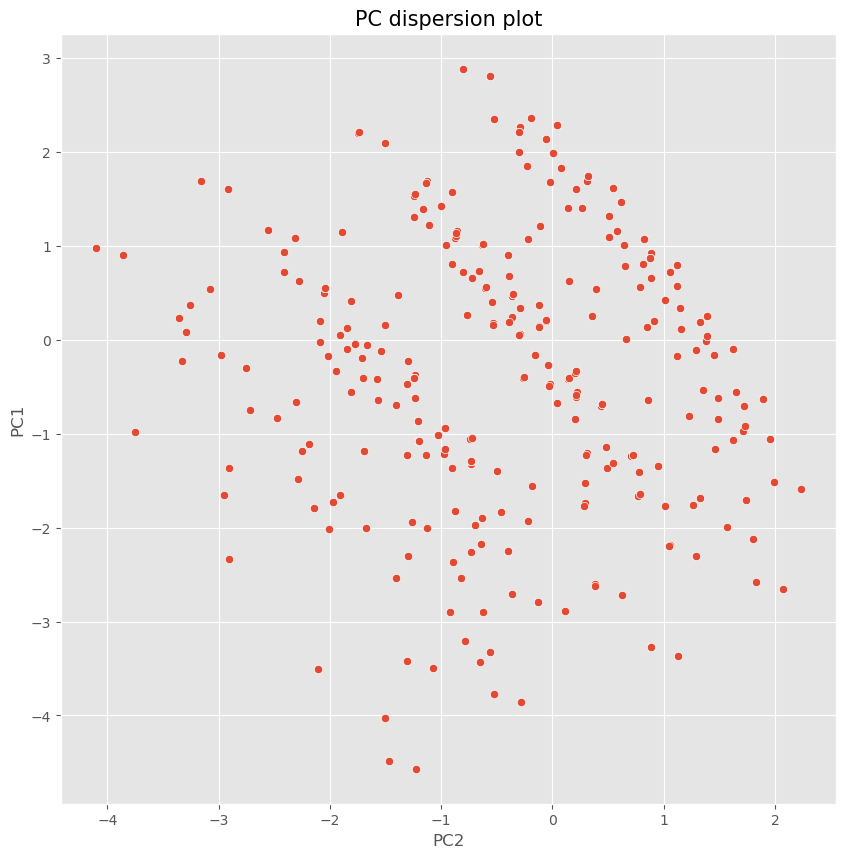

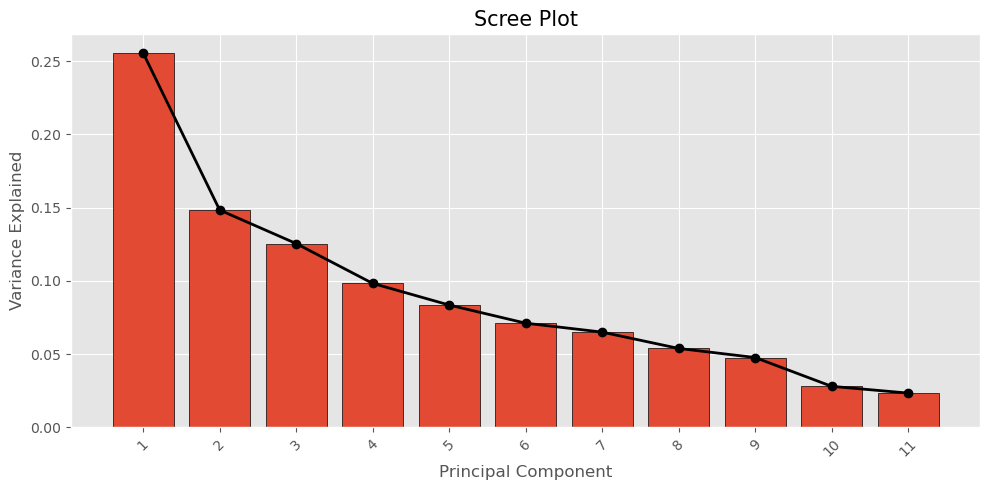

In [19]:
print("Ratio of variance for each column:", "\n", pca.explained_variance_ratio_)   # variance ratio of each column

fig, ax = plt.subplots(figsize=(10, 5))   # set the size of the figure

component_numbers = range(1, len(pca.explained_variance_ratio_) + 1)   # component numbers
ax.bar(component_numbers, pca.explained_variance_ratio_, edgecolor='black')   # creates a bar graph
ax.set_xlabel('Principal Component', fontsize=12)   # x-axis label
ax.set_ylabel('Explained Variance Ratio', fontsize=12)   # y-axis label
ax.set_title('Scree Plot', fontsize=14)   # chart title
ax.tick_params(axis='both', which='major', labelsize=10)   # display parameters
PC_values = np.arange(pca.n_components_) + 1   # numbers of major components

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='black')   # creates a scatter plot
plt.title('Scree Plot', fontsize=15)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.xticks(component_numbers, rotation=45)   # Set and rotate x-axis labels for better visualization.
plt.tight_layout()
plt.show()

> The screeplot visually helps you assess the importance of each component and decide how many major components to use to represent the data effectively.

4. ## *Displaying characteristic variation between PCs*.

- **Calculation of standard deviation**
    - `sd = pca_df.std()` calculates the standard deviation of each principal component in the `pca_df` DataFrame and stores it in the `sd` variable.
    - `print("Standard deviation of PCs:", "\n", sd)` prints the calculated standard deviations.

- **Creation of graph**
    - `fig, ax = plt.subplots(figsize=(10, 10))` creates a figure and a set of axes (`ax`) for the graph, setting the size to 10x10 inches.

- **Scatter plot of principal components**
    - `ax.scatter(pc[:, 1], pc[:, 0], alpha=0.5)` creates a scatter plot in which:
        - `pc[:, 1]` represents the values of the second principal component (PC2) for each data point.
        - `pc[:, 0]` represents the values of the first principal component (PC1) for each data point.
        - `alpha=0.5` sets the transparency of the points to 0.5.

- **Add the arrows of the original variables**.
    - `for i, vector in enumerate(pca.components_.T)` iterates through the principal components (row by row in the component array) and their positions (`i`).
        - `ax.arrow(0, 0, vector[0] * 3, vector[1] * 3, head_width=0.2, head_length=0.3, color='b')` draws a blue arrow for each principal component, starting from the origin (0, 0) and with a length proportional to the variable's contribution to the principal component.
        - `ax.text(vector[0] * 3.2, vector[1] * 3.2, str(i), color='r', ha='center', va='center')` adds a red numeric label (the index of the principal component) to the tip of each arrow.

Standard deviation of PCs: 
 PC1     1.677250
PC2     1.277868
PC3     1.175207
PC4     1.040053
PC5     0.958620
PC6     0.884613
PC7     0.845774
PC8     0.769870
PC9     0.724065
PC10    0.554809
PC11    0.506983
dtype: float64


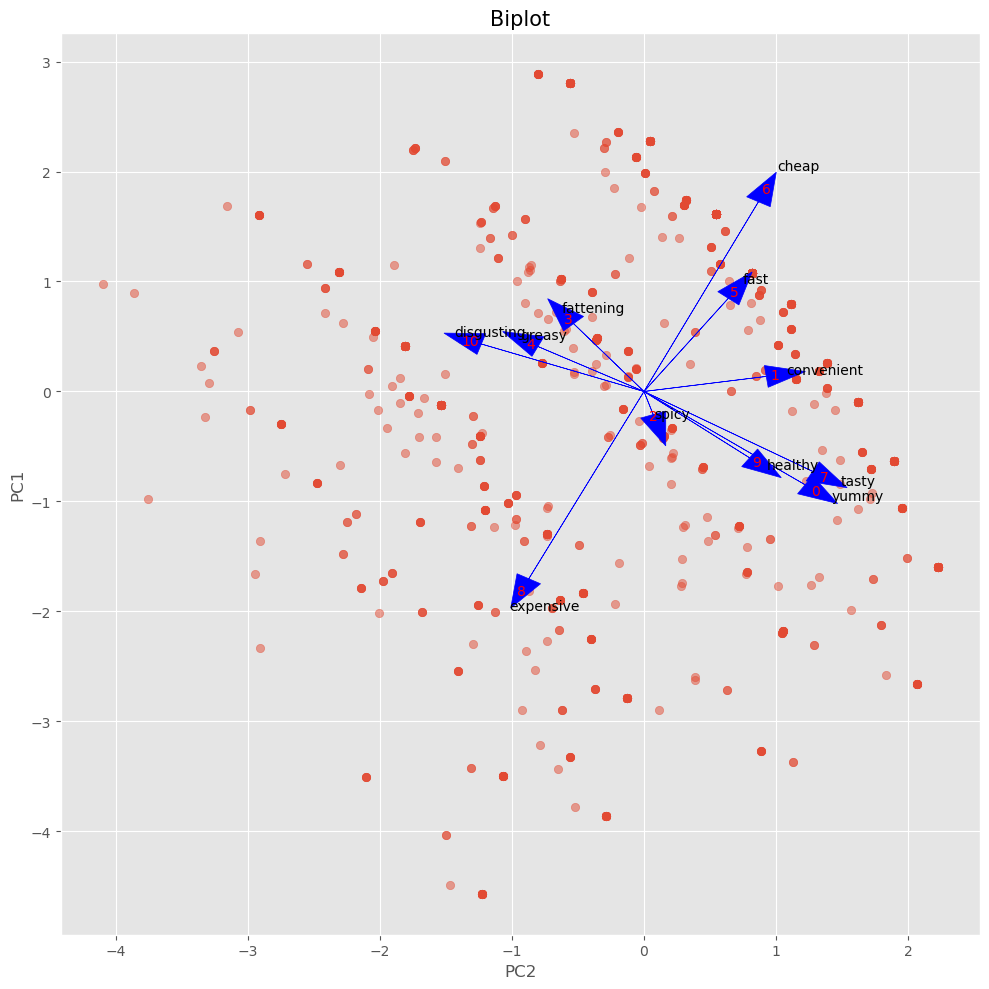

In [20]:
sd=pca_df.std()  # standard deviation of all components
print("Standard deviation of PCs:", "\n", sd)

fig, ax = plt.subplots(figsize=(10, 10))   # set the size of the figure

ax.scatter(pc[:, 1], pc[:, 0], alpha=0.5)   # creates a scatter plot of principal components.

for i, vector in enumerate(pca.components_.T):   # creates an arrow for each major component
    ax.arrow(0, 0, vector[0] * 3, vector[1] * 3, head_width=0.2, head_length=0.3, color='b')   # creates an arrow
    ax.text(vector[0] * 3.2, vector[1] * 3.2, str(i), color='r', ha='center', va='center')   # label the arrows

ax.set_xlabel('PC2', fontsize=12)   # x-axis label
ax.set_ylabel('PC1', fontsize=12)   # y-axis label
ax.set_title('Biplot', fontsize=15)   # chart title

try:
    feature_names = data.columns   #add feature names to the graph
except AttributeError:
    feature_names = [str(i) for i in range(data.shape[1])]   # adds feature names to the graph

for i, vector in enumerate(pca.components_.T):
    ax.text(vector[0] * 3.5, vector[1] * 3.5, feature_names[i], fontsize=10)   # label the arrows with feature names

plt.tight_layout()
plt.show()

> The biplot is useful for visualizing both the relationships between samples and the relationships between the original variables in a space of reduced dimensionality.

## **Correlations between PC and features**

***List of variables:***

|Variable|Type|Description|
|---|---|---|
|`loadings`|NumPy array|An array containing the correlation coefficients (loadings) between original features and principal components. Each row represents a principal component and each column represents an original feature.|
|`num_pc`|Integer|The number of principal components to be considered (in this case, 11).|
|`pc_list`|List|A list of strings representing the names of the principal components (from 'PC1' to 'PC11').|
|`loadings_df`|Pandas DataFrame|A DataFrame containing the loadings, with the principal components as rows and the original features as columns. The index of the DataFrame is the name of the original variable.|

***The following blocks of code:***
1. Calculate the correlation between PCs and features.
2. They display these correlations in a heatmap.

1. ## *Calculation of correlations between PCs and features*.

    - `loadings = pca.components_` extracts loadings from the PCA object and assigns them to the `loadings` variable.
        - The loadings indicate how much each original feature contributes to each principal component.
    - `num_pc = 11` sets the number of principal components to be considered to 11.
    - `pc_list` creates a string list containing the names of the principal components, from `PC1` to `PC11`.
    - `loadings_df` creates a DataFrame from a dictionary.
        - `zip(pc_list, loadings)` creates an iterator that pairs the names of the principal components (`pc_list`) with the corresponding rows of the loadings array (`loadings`).
        - `dict(zipper(pc_list, loadings))` converts the iterator to a dictionary, where the keys are the names of the principal components and the values are the rows of the loadings array.
    - `loadings_df['variable'] = focused_data.columns.values` adds a new column called 'variable' to the DataFrame `loadings_df`.
        - The values of this column are the column names of the DataFrame `focused_data`, which correspond to the original features.
    - `loadings_df = loadings_df.set_index('variable')` sets the column 'variable' as the index of the DataFrame `loadings_df`.

In [21]:
loadings = pca.components_   # Correlation coefficients between features and components.
num_pc = 11   # number of major components
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]   # names of major components
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))   # creates a DataFrame from the correlation coefficients
loadings_df['variable'] = focused_data.columns.values   # adds column names to the DataFrame
loadings_df = loadings_df.set_index('variable')   # set the index of the DataFrame
loadings_df.head(11)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,0.406955,-0.282615,0.259588,0.026237,-0.346857,0.124916,-0.159878,-0.016587,0.195341,-0.691446,-0.091851
convenient,0.308827,0.045682,0.317151,-0.009424,0.437148,-0.188966,0.661814,-0.150033,0.336539,-0.028831,0.021460
spicy,0.023320,-0.069982,-0.020170,0.845496,0.185551,-0.438661,-0.214188,0.027835,-0.025239,-0.058187,-0.041960
fattening,-0.177861,0.205590,0.608077,-0.023396,-0.086934,-0.107520,0.023851,0.720478,-0.105052,0.020311,-0.074626
greasy,-0.267796,0.136300,0.389568,0.330854,-0.343713,0.278329,0.307300,-0.487275,-0.346137,0.015160,-0.031047
fast,0.213039,0.282441,0.211395,0.090363,0.568939,0.572734,-0.392436,-0.055976,-0.099235,-0.017917,-0.054448
cheap,0.289134,0.575032,-0.125157,0.114477,-0.256981,-0.020657,0.008895,0.064667,0.062027,-0.060323,0.691923
tasty,0.426115,-0.242199,0.269648,0.072691,-0.286099,0.053053,-0.197364,-0.059289,0.213587,0.713426,0.006426
expensive,-0.290944,-0.567528,0.183298,0.035510,0.207362,0.171160,-0.015198,0.061727,0.009675,-0.029581,0.693614


2. ## *Displaying correlations with heatmap*.

    - `sns.heatmap` creates the heatmap using Seaborn:
        - `loadings_df`: The DataFrame that contains the loadings to be displayed.
        - `square=True`: Ensures that the cells in the heatmap are square.
        - `annot=True`: Displays the numeric values of the loadings within each heatmap cell.
        - `fmt=".2f"`: Formats numeric values to two decimal places.
        - `vmin=-1, vmax=1`: Sets the minimum and maximum values of the color scale to -1 and 1, respectively, as the correlation coefficients vary between -1 and 1.
        - `center=0`: Centers the color scale on zero, so that the colors diverge symmetrically for positive and negative loadings.
        - `cmap='coolwarm'`: Uses the `coolwarm` color map, where negative loadings are represented in blue, positive loadings in red, and loadings near zero in white.

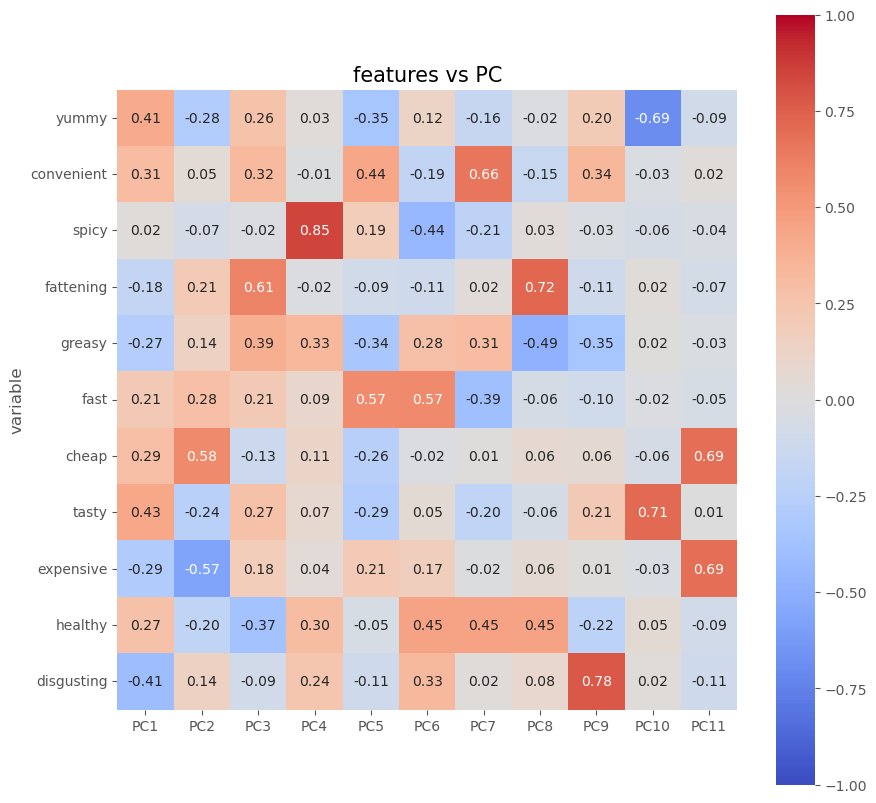

In [22]:
plt.rcParams['figure.figsize'] = (10,10)   # set the size of the figure
ax = sns.heatmap(loadings_df,   # load the correlation coefficients
                 square=True,   # makes the graph square
                 annot=True,   # annotates the values
                 fmt=".2f",   # format the values
                 vmin = -1,   # minimum value
                 vmax = 1,   # maximum value
                 center = 0,   # center
                 cmap = 'coolwarm')   # color map
plt.title('features vs PC', fontsize=15)
plt.show()

**Interpretation of the Heatmap:**

- Each row of the heatmap represents a main component.
- Each column of the heatmap represents an original feature.
- The color of each cell indicates the strength and direction of the correlation between the principal component and the original feature:
    - **Red:** Positive correlation (the feature increases when the principal component increases).
    - **Blue:** Negative correlation (the feature decreases when the principal component increases).
    - **White:** Correlation close to zero (little or no linear relationship).

<br>

> This heatmap is useful for:
> - **Interpreting principal components:** Identifying which original features are most important for each principal component.
> - **Selecting features:** Deciding which original features to use for further analysis or model building, based on their correlation with the principal components.

# **Data population clustering**
Clustering allows similar observations to be grouped according to their characteristics, revealing hidden patterns and structures in the data.

***List of variables:***

| Variable | Type | Description |
| ----------------- | -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `distortions` | List | Stores distortion values (sum of squares of intra-cluster distances) for each value of k (number of clusters).                                        |
| `K` | Range | A range of integer values from 2 to 11, representing the number of clusters to be tested.                                                                             |
| `kmeans` | KMeans object | An object representing the K-means clustering algorithm.                                                                                                          |
| `labels` | NumPy array | An array containing the cluster label assigned to each data point.                                                                                              |
| `silhouette_scores` | List | Stores the Silhouette Score values for each value of k.                                                                                                           |
| `kmeans_labels` | NumPy array | A NumPy array containing the cluster labels predicted by the K-means model.                                                                                          |
| `pca_df_kmeans` | Pandas DataFrame | A DataFrame that combines the principal components (`pca_df`) with the cluster labels (`kmeans_labels`) into a new column called `clusters`.                    |
| `centroids` | Pandas DataFrame | A DataFrame containing the coordinates of the centroids of each cluster, computed as the average of the principal component values for the data points in each cluster. |
| `linked` | NumPy array | Contains information about the hierarchical merges of clusters.                                                                                                            |
| `cluster_labels` | NumPy array | An array containing the cluster label assigned to each data point after hierarchical clustering.                                                               |

***The following blocks of code:***
1. Calculate $n$ clusters in order to identify the optimal number of clusters to apply.
2. They segment the data points (clients) into $n$ clusters with K-Means.
3. They add the column i $n$ clusters to the dataframe.
4. Visualization using scatterplot with centroids
5. Hierarchical clustering computation and visualization by dendrogram.


1. ## *Elbow method + Silhouette Score*

    - **Distortion Calculation (Elbow Method):**
        - Initializes an empty `distortions` list to store distortion values.
        - Iterate through a range of values for the number of `K` clusters (2 to 11).
        - For each value of `k`:
            - Initialize a `KMeans` object with `k` clusters, `random_state=0` for reproducibility and `init='k-means++'` for better initialization of centroids.
            - Fits the K-means algorithm to the data in `pca_df` (the principal components computed earlier).
            - Calculates the distortion (sum of squares of intra-cluster distances) and adds it to the `distortions` list.
    
    - **Calculation of Silhouette Score:**
        - Initializes an empty `silhouette_scores` list to store silhouette scores.
        - Iterate again through the range of values for `k`.
        - For each value of `k`:
            - Initialize a `KMeans` object as before.
            - Fits the K-means algorithm to the data and obtains the cluster labels assigned to each data point (`labels`).
            - It calculates the average Silhouette Score for all data points and adds it to the `silhouette_scores` list. The Silhouette Score measures how well each data point fits its cluster relative to the other clusters.

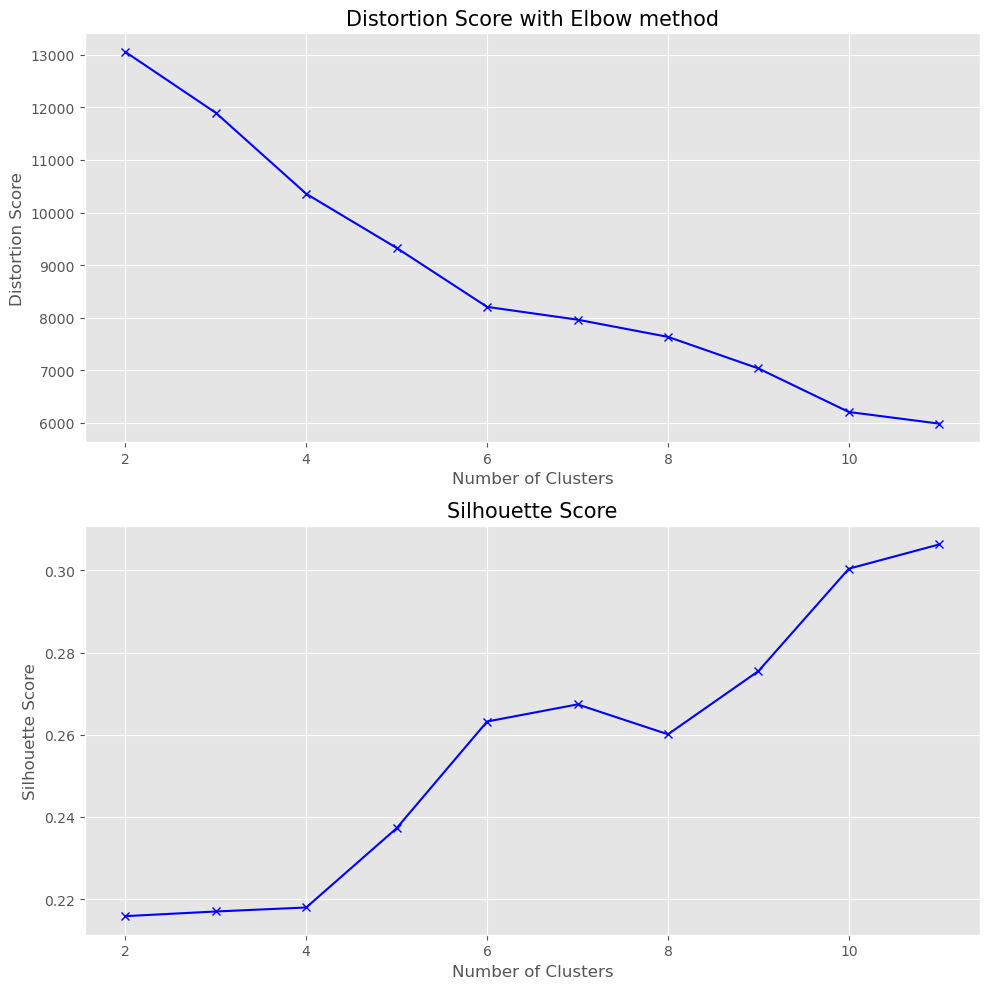

In [23]:
distortions = []   # empty list for distortions
K = range(2, 12)   # range of values for the number of clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')   # initializes the KMeans algorithm
    kmeans.fit(pca_df)   # fit the data
    distortions.append(kmeans.inertia_)   # calculates the distortion

silhouette_scores = []   # empty list for silhouette scores.

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')   # initializes the KMeans algorithm
    labels = kmeans.fit_predict(pca_df)   # fit the data and predict clusters
    silhouette_scores.append(silhouette_score(pca_df, labels))   # calculates the silhouette score

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score')  
plt.title('Distortion Score with Elbow method', fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score', fontsize=15)


plt.tight_layout()
plt.show()

> Both graphs help to visually evaluate and choose the optimal number of clusters to use for K-means clustering on principal component data.
> - **Elbow Method:** Look for an "elbow" in the skewness graph, where adding additional clusters does not significantly reduce the skewness.
> - **Silhouette Score:** Look for the highest value of the Silhouette Score, which indicates better separation and cohesion of clusters.

2. ## *Clustering K-Means*

    - `kmeans` initializes the K-means algorithm with:
        - `n_clusters=6`: Number of clusters to be created (6 in this case).
        - `random_state=0`: Sets the seed of the random number generator to ensure reproducibility of the results.
    - `.fit(focused_data)`: Fits the K-means model to the data in `focused_data`, finding the 6 clusters that best represent the data.


In [24]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0).fit(focused_data)   # initializes the KMeans algorithm with 6 clusters.

print('Number of iterations:', kmeans.n_iter_, '\n')   # number of iterations the k-means algorithm performs to obtain a minimum sum of squares within the cluster
print('Centroid location:', kmeans.cluster_centers_, '\n')   # Position of centroids in each cluster
print ('Sum of squares of clusters:', kmeans.inertia_)   # gives the sum of squares within the cluster

Number of iterations: 6 

Centroid location: [[ 3.04000000e-01  9.12000000e-01  9.60000000e-02  5.20000000e-01
   4.00000000e-02  7.92000000e-01  8.00000000e-03  4.64000000e-01
   6.64000000e-01  2.56000000e-01  4.00000000e-02]
 [ 9.43820225e-01  9.62546816e-01  1.31086142e-01  9.81273408e-01
   6.96629213e-01  8.76404494e-01  1.12359551e-01  9.43820225e-01
   9.10112360e-01  1.79775281e-01  1.27340824e-01]
 [-1.11022302e-16  9.66942149e-01  1.40495868e-01  8.92561983e-01
   5.61983471e-01  9.50413223e-01  9.09090909e-01  1.00000000e+00
   5.78512397e-02  1.32231405e-01  1.81818182e-01]
 [ 1.00000000e+00  9.84031936e-01  8.78243513e-02  8.16367265e-01
   3.71257485e-01  9.60079840e-01  9.56087824e-01  9.84031936e-01
   1.99600798e-02  3.27345309e-01  4.99001996e-02]
 [ 3.16205534e-02  8.81422925e-01  5.92885375e-02  9.32806324e-01
   6.24505929e-01  9.60474308e-01  9.44664032e-01  6.66133815e-16
   2.37154150e-02  8.69565217e-02  4.22924901e-01]
 [ 2.15053763e-02  6.18279570e-01  6.989

3. ## *Cluster assignment*

    - `kmeans_labels = kmeans.fit_predict(pca_df)` performs two operations simultaneously:
        - **Fitting the K-means model (`fit`)**: The K-means model, previously initialized with a specific number of clusters, is trained on the data in `pca_df`.
            - During training, the algorithm tries to find the optimal centroids for each cluster by minimizing the total distance between the data points and their assigned centroids.
        - **Predicting cluster labels (`predict`)**: After training, the model assigns a cluster label (an integer from 0 to k-1, where k is the number of clusters) to each data point in `pca_df` based on its proximity to centroids. These labels are stored in the NumPy `kmeans_labels` array.
    - `pca_df_kmeans` :creates a new DataFrame by concatenating:
        - The original DataFrame `pca_df` containing the principal components.
        - A new DataFrame created by `pd.DataFrame({'cluster': kmeans_labels})`, which has a single column called `cluster` containing the cluster labels provided by K-means.
        - `axis=1` specifies that concatenation occurs along the columns, adding the column 'cluster' as a new column in `pca_df_kmeans`.

In [25]:
kmeans_labels = kmeans.fit_predict(pca_df)   # Fit the model and predict cluster labels.
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': kmeans_labels})], axis=1)   # Concatenates cluster labels with the PCA DataFrame.
pca_df_kmeans.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,cluster
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170,3
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681,1
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530,5
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201,2
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144,3


> In this way we enrich the DataFrame of the principal components with information about the clusters resulting from K-means clustering. This can be useful for:
> - **Viewing:** Creating graphs showing how data points are clustered in the principal component space.
> - **Analysis:** Studying the characteristics of different clusters to identify groups of customers with similar preferences.
> - **Modeling:** Use cluster labels as an additional variable in other analysis or machine learning models.

4. ## *Visualization by scatterplot with centroids*.

- `fpc = 'PC2'` and `spc = 'PC1'` assign the names of the principal components to be displayed on the x and y axes.
- `sns.scatterplot` creates a scatter plot using Seaborn:
        - `x=fpc, y=spc`: Specifies that PC2 will be displayed on the x-axis and PC1 on the y-axis.
        - `hue="cluster"`: Colors the points according to the label of the cluster they belong to.
        - `data=pca_df_kmeans`: Uses the DataFrame that contains the principal components and cluster labels.
        - `palette=colors`: Uses a predefined color palette to distinguish clusters.

- `centroids` calculates the coordinates of the centroids of each cluster:
        - `groupby('cluster')`: Groups the data by cluster.
        - `mean()`: Calculates the average of PC1 and PC2 for each cluster.
        - `reset_index()`: Resets the index of the resulting DataFrame.
- `for i, centroid in centroids.iterrows()` iterates through the computed centroids.
    - `ax.scatter(centroid[fpc], centroid[spc], marker='s', s=200, color=colors[i])` adds a square to the graph to represent the centroid of the current cluster.
        - `marker='s'`: Uses a square as a marker for centroids.
        - `s=200`: Sets the size of the marker to 200.
        - `color=colors[i]`: Uses the same color as the corresponding cluster for the centroid.

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_2024\2490323375.py:5: UserWarning: The palette list has more values (14) than needed (6), which may not be intended.
  ax = sns.scatterplot(x=fpc, y=spc, hue="cluster", data=pca_df_kmeans, palette=colors)   # creates the scatter plot with cluster colors


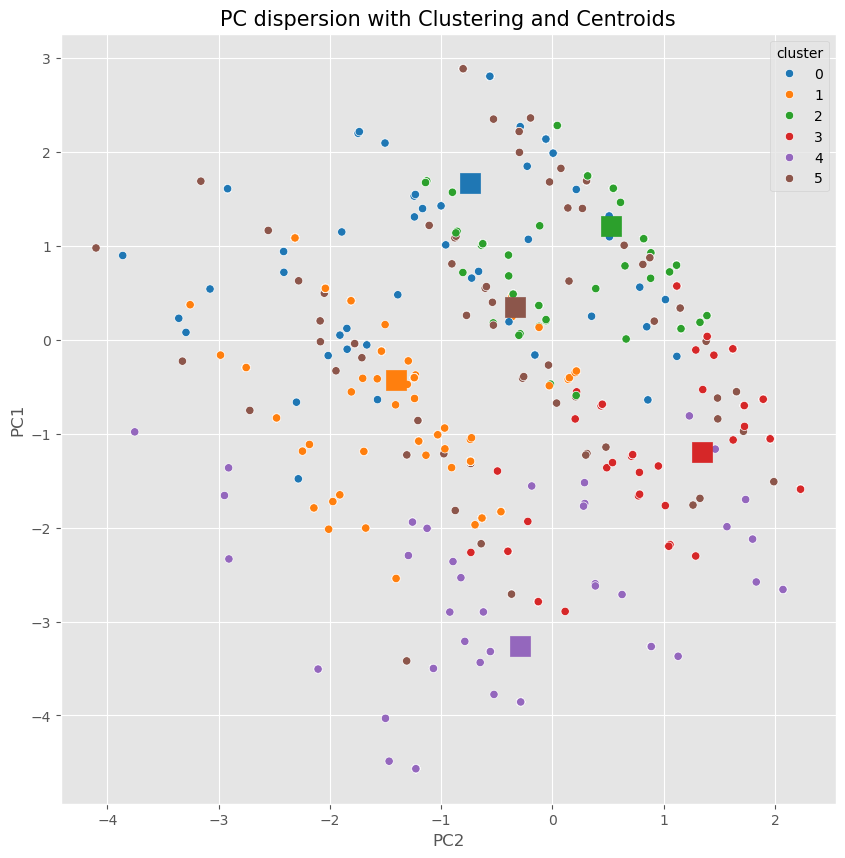

In [26]:
plt.figure(figsize=(10, 10))

fpc = 'PC2'
spc = 'PC1'
ax = sns.scatterplot(x=fpc, y=spc, hue="cluster", data=pca_df_kmeans, palette=colors)   # creates the scatter plot with cluster colors


centroids = pca_df_kmeans.groupby('cluster').mean().reset_index()   # Calculation of centroids for each cluster


for i, centroid in centroids.iterrows():
    ax.scatter(centroid[fpc], centroid[spc], marker='s', s=200, color=colors[i])   # creates a point for each centroid

plt.title("PC dispersion with Clustering and Centroids", fontsize=15)
plt.show()

> K-means clustering results in the plane of the first two principal components are displayed, highlighting the centroids of each cluster. This graph allows you to:
> - **View the separation of the clusters:** Observe how well the clusters are separated from each other in principal component space.
> - - **Identify the location of the centroids:** Understand where the "center" of each cluster is located, which represents the midpoint of the characteristics of the customers belonging to that cluster.
> - **Evaluate clustering quality:** Check whether the centroids are well distributed and whether the clusters have a reasonable shape (e.g., not too elongated or overlapping).

5. ## *Hierarchical agglomerative clustering with dendrogram*.

    - `linked = linkage(pca_df.iloc[:, :11], method='ward')` performs agglomerative hierarchical clustering on the first 11 principal component data (`pca_df.iloc[:, :11]`).
        - `method='ward'`: Specifies the linkage method to be used, in this case Ward's method, which minimizes the intra-cluster variance at each merge.
        - The `linkage` function returns a `linked` matrix that contains information about the hierarchical merges.
    - `cluster_labels` assigns a cluster label to each data point based on the dendrogram and a specified cutoff criterion.
        - `t=6` indicates that 6 clusters are desired.
        - `criterion='maxclust'` specifies that the cut criterion is the maximum number of clusters.
    - `pca_df['Cluster'] = cluster_labels` adds a new column called `cluster' to the `pca_df` DataFrame, containing the cluster labels assigned to each data point.
    - `dendrogram(linked)` creates a dendrogram, a tree graph showing the hierarchy of clusters.
            - The leaves of the dendrogram represent the individual data points.
            - The inner branches represent the cluster merges.
            - The height of each merger indicates the distance between merged clusters.

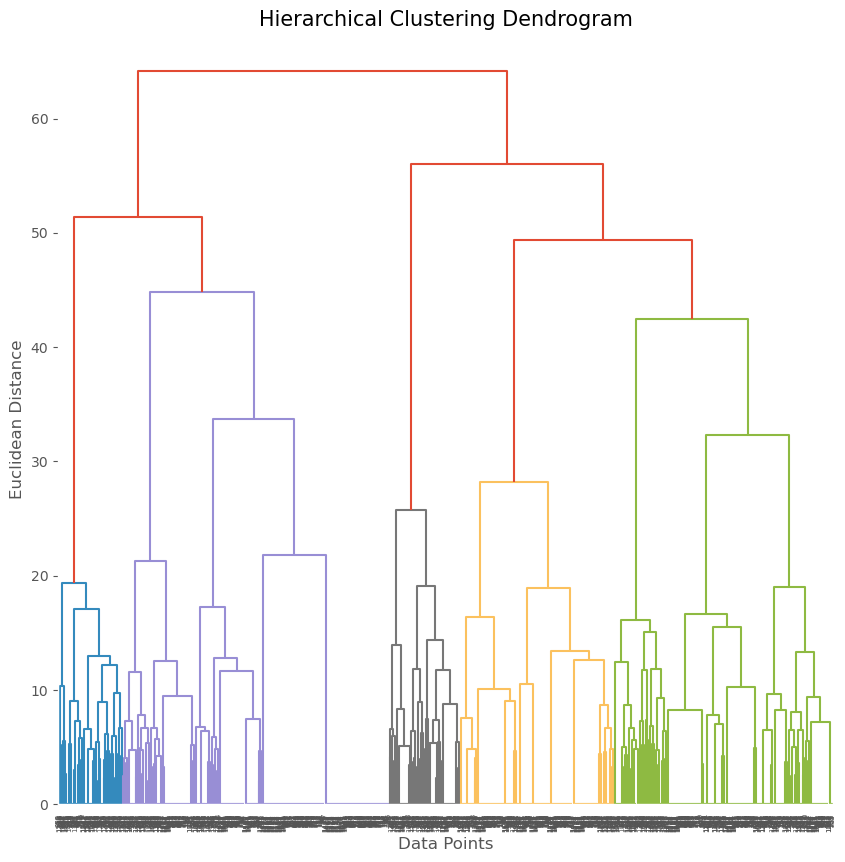

In [27]:
linked = linkage(pca_df.iloc[:, :11], method='ward')   # Performs hierarchical clustering.
cluster_labels = fcluster(linked, t=6, criterion='maxclust')   # Mark cluster labels.
pca_df['Cluster'] = cluster_labels   # Adds cluster labels to the DataFrame.


plt.figure(figsize=(10, 10))
dendrogram(linked)   # Create a dendrogram
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Hierarchical Clustering Dendrogram', fontsize=15)
plt.show()

> *Objectives achieved:*
> - **Perform hierarchical clustering:** Group principal component data into hierarchical clusters using Ward's method.
> - **View dendrogram:** Create a tree graph (dendrogram) to visualize the hierarchy of clusters and the distance between them.
> - **Assign labels to clusters:** Cut the dendrogram to obtain a specific number of clusters (6 in this case) and assign a label to each data point based on the cluster to which it belongs.

6. ## *Visualization by scatterplot with clustered data points*.

    - `pca_df = pca_df.sort_values(by='Cluster')` sorts the `pca_df` DataFrame by the values in the 'Cluster' column.
        - This is done to ensure that the points in the scatter plot are plotted in a specific order, making it easier to visually distinguish clusters.

    - `for cluster in pca_df['Cluster'].unique()` iterates over each unique cluster label found in the `cluster' column of the `pca_df` DataFrame.
        - `cluster_data = pca_df[pca_df['Cluster'] == cluster]`creates a temporary DataFrame `cluster_data` that contains only the rows of `pca_df` belonging to the current cluster being processed.
        - `plt.scatter(...)`creates a scatter plot for the current cluster:
            - `cluster_data[fpc]` and `cluster_data[spc]`: These are the x and y coordinates of the points in the scatter plot, taken from the first and second principal components of the data points belonging to the current cluster.
            - `label=f'Cluster {cluster}'`: Assigns a label to the cluster, which will be used in the graph legend.

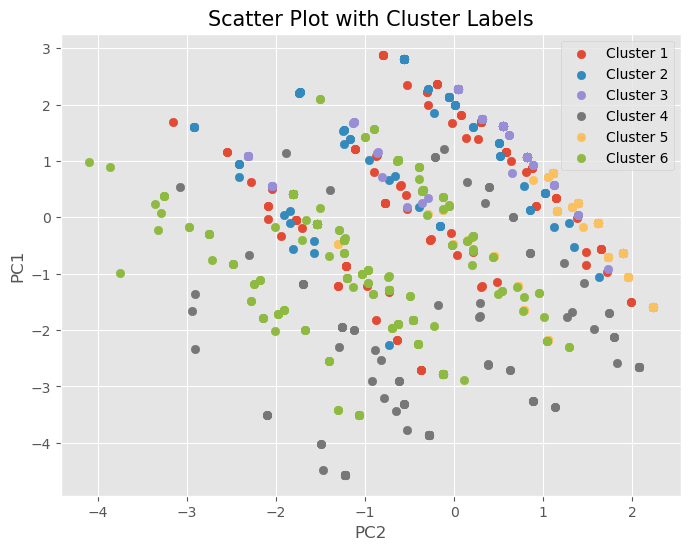

In [28]:
pca_df = pca_df.sort_values(by='Cluster')   # sort the DataFrame by the column 'Cluster'

plt.figure(figsize=(8, 6))

fpc = 'PC2'
spc = 'PC1'

for cluster in pca_df['Cluster'].unique():   
    cluster_data = pca_df[pca_df['Cluster'] == cluster]   # selects the data for each cluster
    plt.scatter(cluster_data[fpc], cluster_data[spc], label=f'Cluster {cluster}')   # creates a scatter plot for each cluster

plt.xlabel(fpc)
plt.ylabel(spc)
plt.title('Scatter Plot with Cluster Labels', fontsize=15)
plt.legend()
plt.show()

> Scatter plot in which each point represents a data point in the dataset and the points are colored according to their assignments to the cluster.
> - The x and y axes of the graph represent the first and second principal components, and the graph includes a legend to identify the different clusters.